# Police violence in America
In the wake of recent protests against police violence, especially against black people, the question arises what numbers can tell us, to proof that cases like the killing of George Floyd are not unique cases. 
1. Are black people killed more often than other ethnicities regarding population distribution?
2. Are there places in America where black people are killed more often? 
3. How many of the police officers that killed someone were held accountable? 
4. Can we identify any solutions that seem to lower the number of killings? 

# Importing data

In [1]:
# Install packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calmap
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Import Dataset from url source 
url = "https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx"

police_killings = pd.read_excel(url , sheet_name=0)
pd_killings = pd.read_excel(url, sheet_name=1)
state_killings = pd.read_excel(url, sheet_name=2)
blackmen_killings = pd.read_excel(url, sheet_name=3)

In [113]:
police_killings.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed/Did Not Have a Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Chazz Hailey,22,Male,Pacific Islander,NaN,2020-06-23,1900 Pebblebrook Lane,Sherman,TX,75092.0,...,No,Allegedly Armed,knife,attack,NaN,NaN,NaN,NaN,NaN,NaN
1,Kevin Pulido,43,Male,Hispanic,NaN,2020-06-23,Mesa Avenue and Bragdon Avenue,Pueblo,CO,81004.0,...,No,Allegedly Armed,gun,attack,NaN,No,5943.0,NaN,NaN,NaN
2,Matthew L. Fox,40,Male,Unknown race,NaN,2020-06-23,Blind Nick Drive,Wasilla,AK,99654.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Name withheld by police,43,Male,Black,NaN,2020-06-22,W Independence St & N Waco St,Giddings,TX,78942.0,...,No,Allegedly Armed,knife,attack,Not fleeing,No,5945.0,NaN,NaN,NaN
4,Name withheld by police,NaN,Male,Unknown race,NaN,2020-06-22,East 35th Place and Sable Boulevard,Aurora,CO,80011.0,...,No,Allegedly Armed,gun,attack,Not fleeing,Yes,5938.0,NaN,NaN,NaN


In [4]:
pd_killings.head()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,10.0,1.0,...,6040.333333,11.065881,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.375820
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.666667,3.546806,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.502131
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.333333,10.894620,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.249641
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,1.0,NaN,4.0,1.0,...,1921.800000,5.258895,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.824724
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.000000,11.799916,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900.0,6.276151


In [31]:
state_killings.head()

,State,Population,African-American Alone,% African-American,% Victims Black,Disparity,# Black people killed,# Hispanic people killed,# Native American people killed,# Asian people killed,# Pacific Islanders killed,# White people killed,# Unknown Race people killed,# People Killed,Rate (Black People),Rate (All People),Disparity in Rate
0,Alabama,4779736.0,1251311.0,0.261795,0.376812,0.115017,52.0,NaN,NaN,1.0,NaN,73.0,12.0,138.0,5.936631,4.124555,1.439338
1,Alaska,710231.0,23263.0,0.032754,0.121951,0.089197,5.0,1.0,12.0,NaN,NaN,15.0,8.0,41.0,30.704798,8.246814,3.723232
2,Arizona,6392017.0,259008.0,0.040521,0.090379,0.049858,31.0,114.0,14.0,NaN,NaN,141.0,43.0,343.0,17.098203,7.665812,2.230449
3,Arkansas,2915918.0,449895.0,0.154289,0.271845,0.117555,28.0,3.0,NaN,1.0,NaN,59.0,12.0,103.0,8.890963,5.046193,1.761915
4,California,37253956.0,2299072.0,0.061713,0.156830,0.095116,186.0,489.0,7.0,44.0,9.0,333.0,118.0,1186.0,11.557458,4.547935,2.541254


In [5]:
blackmen_killings.head()

,City,PD,Black Men Killed by Police (1/1/2013-12/31/2019),Black Male Population (2015 ACS) (Source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_B01001B&prodType=table),"Average Police Homicide Rate for Black Men (per 100,000) (2013-19)"
0,Reno,Reno Police Department,3.0,3556.0,12.052065
1,Oklahoma City,Oklahoma City Police Department,25.0,42192.0,8.464706
2,Santa Ana,Santa Ana Police Department,1.0,1779.0,8.030194
3,Anaheim,Anaheim Police Department,2.0,4021.0,7.105553
4,St. Louis,St. Louis Metropolitan Police Department,34.0,69439.0,6.994834


# Handling missing data

In [29]:
def missingdata_stats(lst):
    '''
    Takes a dataset and prints information with different measures of missing data.

    INPUT:
        lst (List of pandas.DataFrame): List of uncleaned pandas dataframe after loading.
    OUTPUT: 
        df (pandas.DataFrame): Stats of missing data of dataframe
    '''

    stats = []
    
    # Iterate through list of dataframes
    for df in lst: 
        # Columns with different values of missing data 
        zero_missing = df.columns[df.isnull().mean()==0]
        ten_missing = df.columns[df.isnull().mean() <= 0.1]
        thirty_missing = df.columns[df.isnull().mean() <= 0.3]
        eighty_missing = df.columns[df.isnull().mean() <= 0.8]

        stats.append([len(zero_missing), len(ten_missing), len(thirty_missing), len(eighty_missing)])
    
    # Convert to dataframe
    stats_df = pd.DataFrame(stats, 
                            columns=["0% missing", "<=10% missing", "<=30% missing","<=80% missing"]
                           )
    
    return stats_df

In [30]:
# List with dataframes
data_list = [police_killings, pd_killings, state_killings, blackmen_killings]

# See overview with the function we built
missingdata_stats(data_list)

,0% missing,<=10% missing,<=30% missing,<=80% missing
0,7,21,22,26
1,13,38,41,44
2,11,12,14,16
3,3,5,5,5


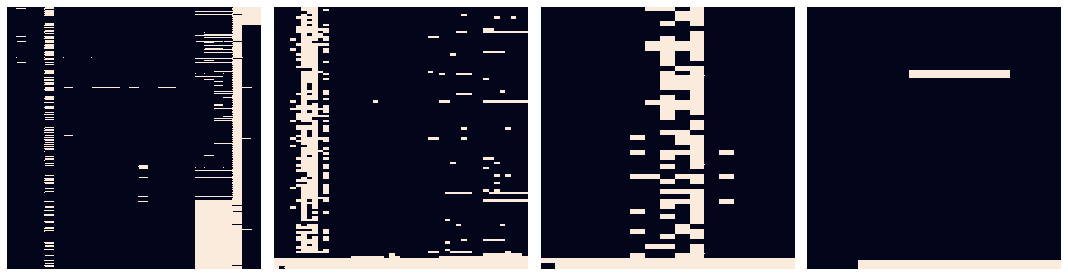

In [8]:
def plot_missing(df_1, df_2, df_3, df_4):
    sns.set(style="white", color_codes=True)

    # Set up the matplotlib figure
    f, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=False)
    sns.despine(left=True)

    # Plot subplots for different datasets
    sns.heatmap(df_1.isnull(), cbar=False, ax=axes[0])
    sns.heatmap(df_2.isnull(), cbar=False, ax=axes[1])
    sns.heatmap(df_3.isnull(), cbar=False, ax=axes[2])
    sns.heatmap(df_4.isnull(), cbar=False, ax=axes[3])

    # Layout settings
    plt.setp(axes, yticks=[], xticks=[])
    plt.tight_layout()
    
plot_missing(police_killings, pd_killings, state_killings, blackmen_killings)

In [9]:
# Except from Police Killings dataset, all have a lot missing data in the last couple of rows
pd_killings = pd_killings.dropna(how="all", axis=0)
pd_killings = pd_killings.drop([105], axis=0)

state_killings = state_killings.dropna(how="all", axis=0)
state_killings = state_killings.drop([52], axis=0)

blackmen_killings = blackmen_killings.dropna(how="all", axis=0)
blackmen_killings = blackmen_killings.drop([32], axis=0)

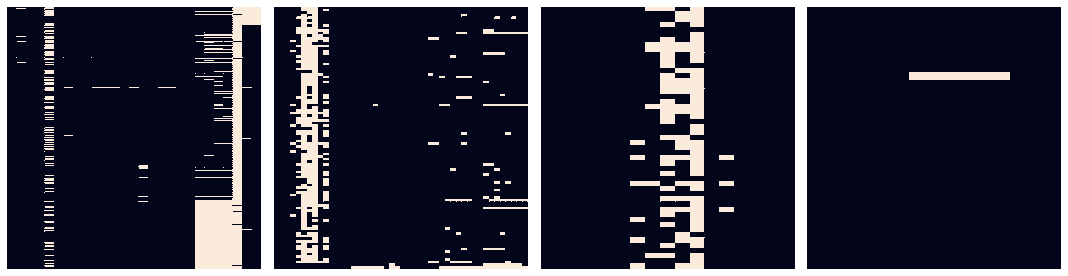

In [10]:
# Plot again to check deleted data
plot_missing(police_killings, pd_killings, state_killings, blackmen_killings)

# Killings of black people

### Proportion of black people killed

In [35]:
# Calculating percentage of black people in relation to population
percentage = state_killings["African-American Alone"].sum() / state_killings["Population"].sum()

# Calculating percentage of black people killed in relation to all killed people
percentage_killed = state_killings["# Black people killed"].sum() / state_killings["# People Killed"].sum()

print("{}% of all people killed by police from 2013 on are black, although they make up only {}% of US population.".format(round(percentage_killed*100,2), round(percentage*100,2)))

25.37% of all people killed by police from 2013 on are black, although they make up only 12.67% of US population.


### Distribution of killings per ethnicity

In [95]:
# Get counts of killings per race
race_dist = police_killings["Victim's race"].str.title().value_counts() # Words are titled in case of false lower or upper spelling

# Plot graph
fig = px.bar(race_dist, 
             x=race_dist.index, 
             y=race_dist.values,
             color=race_dist.index)

fig.show()

### Killings per million 

In [53]:
# Filter for killings per million nationwide average
homicide_rate = pd_killings.iloc[-1,25:28].to_frame()

homicide_rate.columns = ["Percentage"]

# Plot graph
fig = px.bar(homicide_rate, 
             x=homicide_rate.index, 
             y=homicide_rate.Percentage, 
             color=homicide_rate.index
            )

fig.update_layout(xaxis={'categoryorder':'category ascending'})

fig.show()

### Time frequency of killings

In [14]:
# Look up the range of dates the dataset includes
police_killings["Date of Incident (month/day/year)"].describe()

count                    8239
unique                   2568
top       2013-06-16 00:00:00
freq                       10
first     2013-01-01 00:00:00
last      2020-06-23 00:00:00
Name: Date of Incident (month/day/year), dtype: object

In [60]:
# Filter for days where black people were killed 
killing_days = police_killings[police_killings["Victim's race"] == "Black"].iloc[:,5].value_counts().sort_index(ascending=False)
killing_days.tail()

2013-01-09    1
2013-01-07    1
2013-01-04    3
2013-01-03    1
2013-01-01    1
Name: Date of Incident (month/day/year), dtype: int64

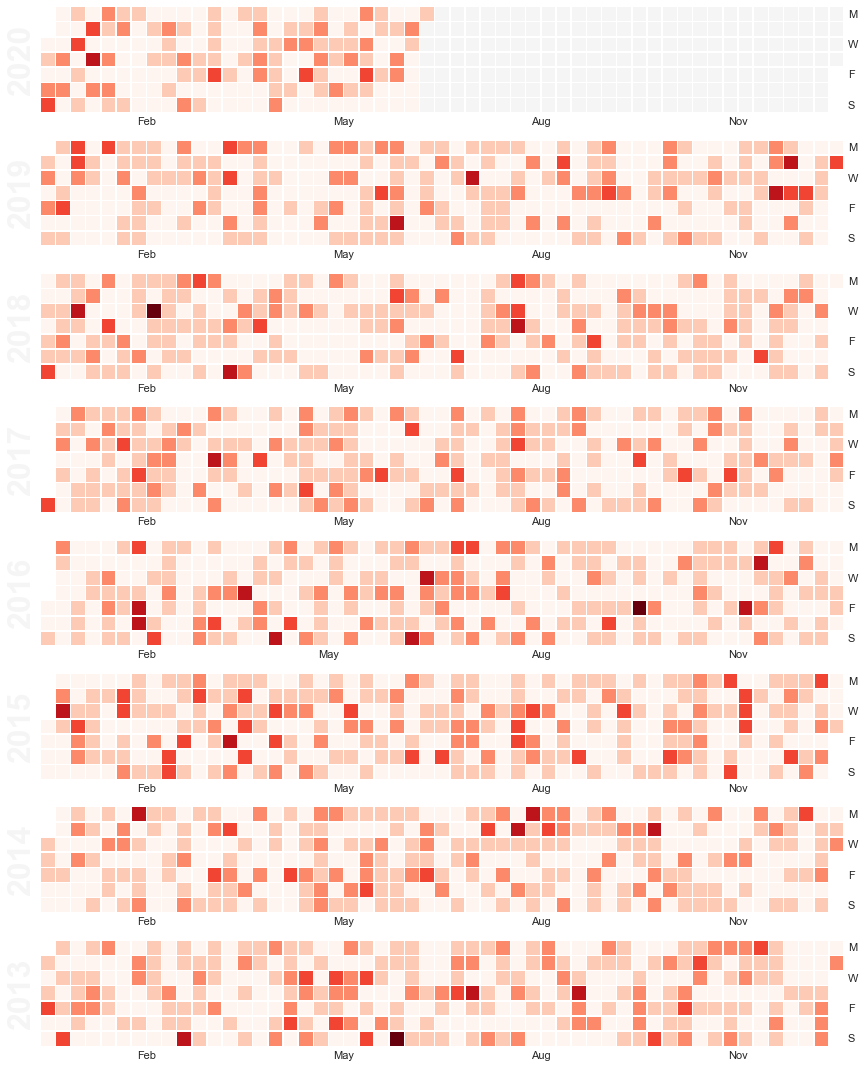

In [61]:
# Plot filtered killings on calendar map
fig = calmap.calendarplot(killing_days, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6],
                    linewidth=0.5,
                    fig_kws=dict(figsize=(12, 15)), 
                    yearascending=False)

### Likeliness for black people to be killed and unarmed compared to other ethnicities

In [107]:
# Get counts of killings per race
unarmed_list = police_killings[police_killings["Unarmed/Did Not Have a Weapon"] == "Unarmed/Did Not Have a Weapon"]
unarmed_dist = unarmed_list["Victim's race"].str.title().value_counts()

unarmed_dist_perc = unarmed_dist / race_dist * 100

# Plot graph
fig = px.bar(unarmed_dist_perc, 
             x=unarmed_dist_perc.index, 
             y=unarmed_dist_perc.values,
             color=unarmed_dist_perc.index)
# Sort bars
fig.update_layout(xaxis={'categoryorder':'category ascending'})

fig.show()

### It's not about the crime

In [72]:
pd_killings.tail()

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
97,Virginia,Virginia Beach,Virginia Beach Police Department,3.0,NaN,NaN,NaN,NaN,2.0,1.0,...,644.833333,1.472242,24359.0,23247.0,20259.0,19190.0,18668.0,17071.0,19687.00,3.047696
98,Kansas,Wichita,Wichita Police Department,1.0,2.0,NaN,NaN,NaN,10.0,NaN,...,3932.000000,10.283287,10566.0,9323.0,9307.0,9120.0,8322.0,3931.0,8000.60,16.248781
99,North Carolina,Winston-Salem,Winston-Salem Police Department,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1561.000000,6.798277,19742.0,18875.0,16146.0,15432.0,NaN,12786.0,15809.75,1.897563
100,United States,Big Cities Average,Big Cities Average,755.0,463.0,19.0,44.0,16.0,526.0,149.0,...,466620.500000,7.537083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.870355
101,United States,Nationwide Average,Nationwide Average,1949.0,1339.0,112.0,118.0,42.0,3385.0,736.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Select average homicide rate by police and violent crime rate per state and city
crime_vs_killings = pd_killings[:-2][["Avg Annual Police Homicide Rate", "Violent Crime Rate"]].sort_values(by="Violent Crime Rate") # Skip last two rows because they contain aggregated data
crime_vs_killings.index = pd_killings[:-2]["City"]

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=crime_vs_killings.index, y=crime_vs_killings.iloc[:,0], mode="markers", name="Avg Annual Police Homicide Rate per 1M Population"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=crime_vs_killings.index, y=crime_vs_killings.iloc[:,1], mode="markers", name="Violent Crime Rate Per 1K Population"),
    secondary_y=True,
)
# Add figure title
fig.update_layout(
    title_text="It's not about the crime"
)

# Set x-axis title
fig.update_xaxes(title_text="U.S. Cities")

# Set y-axes titles
fig.update_yaxes(title_text="Police Homicide Rate", secondary_y=False)
fig.update_yaxes(title_text="Violent Crime Rate", secondary_y=True)

fig.show()

In [108]:
# Plot graph
fig = px.scatter(crime_vs_killings, 
             x="Violent Crime Rate", 
             y="Avg Annual Police Homicide Rate",
             trendline="ols")

# Get OLS regression model stats
results = px.get_trendline_results(fig)

# Show plot
fig.show()

In [109]:
# Show OLS regression stats
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.480
Date:                Sun, 28 Jun 2020   Prob (F-statistic):            0.00741
Time:                        18:21:00   Log-Likelihood:                -238.58
No. Observations:                 100   AIC:                             481.2
Df Residuals:                      98   BIC:                             486.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6995      0.561      6.591      0.000       2.586       4.813
x1             0.1770      0.065      2.735      0.007       0.049       0.305
==============================================================================
Omnibus:                       25.026   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.143
Skew:                           1.107   Prob(JB):                     3.16e-09
Kurtosis:                       5.119   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Accountability of police officers

In [123]:
# Show value counts of criminal charges
accountability = police_killings["Criminal Charges?"].str.lower().value_counts()
accountability

no known charges                                                                 8094
charged with a crime                                                               55
no                                                                                 38
charged, acquitted                                                                 17
charged, mistrial                                                                   5
charged, convicted                                                                  4
charged, convicted, sentenced to life in prison                                     3
charged, charges tossed                                                             2
charged, convicted, sentenced to 30 years in prison                                 2
charged, convicted, sentenced to 5 years probation.                                 2
charged, convicted, sentenced to 16 years in prison                                 1
charged, convicted, sentenced to 2.5 years in prison  

In [124]:
no_charges = (accountability[0] + accountability[2]) / accountability.sum()
no_charges

0.987012987012987